In [2]:
import pandas as pd

In [4]:
import yfinance as yf

In [5]:
import requests

In [10]:
from fredapi import Fred

In [8]:
fred_api_key = '**************'

In [42]:
sp500 = yf.download("^GSPC", start="1980-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed


In [52]:
sp500 = sp500.resample('MS').first()

In [53]:
sp500

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
1980-01-01,114.160004,117.169998,113.779999,0.000000,65900000
1980-02-01,113.660004,114.120003,111.769997,0.000000,38810000
1980-03-01,102.089996,102.650002,100.019997,0.000000,35840000
1980-04-01,106.290001,106.720001,104.500000,0.000000,30850000
1980-05-01,111.239998,111.550003,108.870003,0.000000,34820000
...,...,...,...,...,...
2023-08-01,4507.660156,4532.259766,4507.390137,4517.009766,3946360000
2023-09-01,4288.049805,4333.149902,4274.859863,4328.180176,3865960000


In [64]:
nasdaq = yf.download("^IXIC", start="1980-01-01", end="2024-01-01")
nasdaq = nasdaq.resample('MS').first()
nasdaq

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^IXIC,^IXIC,^IXIC,^IXIC,^IXIC
Date,,,,,
1980-01-01,148.169998,148.169998,148.169998,148.169998,0
1980-02-01,162.300003,162.300003,162.300003,162.300003,0
1980-03-01,156.869995,156.869995,156.869995,156.869995,0
1980-04-01,133.139999,133.139999,133.139999,133.139999,0
1980-05-01,139.679993,139.679993,139.679993,139.679993,0
...,...,...,...,...,...
2023-08-01,14283.910156,14309.209961,14215.639648,14274.929688,4633770000
2023-09-01,14031.809570,14149.620117,13982.419922,14129.959961,4033960000


In [11]:
fred = Fred(api_key=fred_api_key)

In [ ]:
employment = fred.search('unemployment' )
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-10-01    4.1
2024-11-01    4.2
2024-12-01    4.1
2025-01-01    4.0
2025-02-01    4.1
Length: 926, dtype: float64

<Axes: >

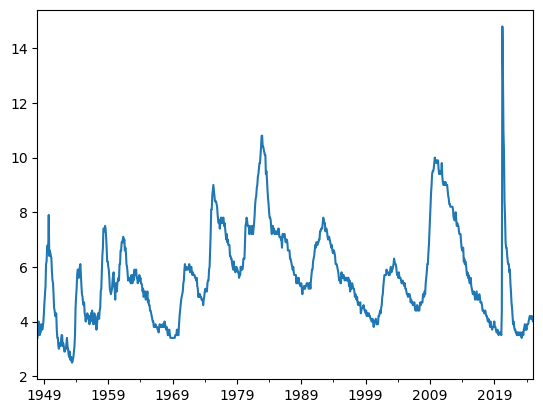

In [21]:
unrate.plot()

In [ ]:
inflation = fred.search('Sticky Price Consumer Price Index less Food and Energy' )
cpi = fred.get_series('CORESTICKM159SFRBATL')
cpi

1967-12-01         NaN
1968-01-01    3.651861
1968-02-01    3.673819
1968-03-01    4.142164
1968-04-01    4.155828
                ...   
2024-10-01    3.963395
2024-11-01    3.876177
2024-12-01    3.746553
2025-01-01    3.625276
2025-02-01    3.516515
Length: 687, dtype: float64

In [ ]:
interest_rates = fred.search('Federal Funds Effective Rate')
fed_funds = fred.get_series('FEDFUNDS')
fed_funds

1954-07-01    0.80
1954-08-01    1.22
1954-09-01    1.07
1954-10-01    0.85
1954-11-01    0.83
              ... 
2024-10-01    4.83
2024-11-01    4.64
2024-12-01    4.48
2025-01-01    4.33
2025-02-01    4.33
Length: 848, dtype: float64

In [66]:
indicators = pd.concat([fed_funds, cpi, unrate], axis=1)
indicators.columns = ['Fed Funds Rate', 'CPI', 'Unemployment Rate']
indicators = indicators.loc["1980-01-01":]
indicators

,Fed Funds Rate,CPI,Unemployment Rate
1980-01-01,13.82,13.469736,6.3
1980-02-01,14.13,13.599493,6.3
1980-03-01,17.19,14.331667,6.3
1980-04-01,17.61,14.755205,6.9
1980-05-01,10.98,15.115273,7.5
...,...,...,...
2024-10-01,4.83,3.963395,4.1
2024-11-01,4.64,3.876177,4.2
2024-12-01,4.48,3.746553,4.1
2025-01-01,4.33,3.625276,4.0


In [ ]:
indicators.to_csv(r'C:\Users\maxar\OneDrive\Documents\Portfolio Projects Data\Econo\Economic Indicators.csv')

In [84]:
sp5001 = sp500[['Close', 'Volume']]
sp5001

Price,Close,Volume
Ticker,^GSPC,^GSPC
Date,,
1980-01-01,114.160004,65900000
1980-02-01,113.660004,38810000
1980-03-01,102.089996,35840000
1980-04-01,106.290001,30850000
1980-05-01,111.239998,34820000
...,...,...
2023-08-01,4507.660156,3946360000
2023-09-01,4288.049805,3865960000


In [86]:
print(sp5001.columns)

MultiIndex([( 'Close', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])


In [ ]:
sp5001.columns = sp5001.columns.droplevel(level=0)

In [91]:
sp5001.columns = ['Close', 'Volume']

In [93]:
sp5001.to_csv(r'C:\Users\maxar\OneDrive\Documents\Portfolio Projects Data\Econo\S&P500.csv')

In [97]:
nasdaq = nasdaq[['Close', 'Volume']]
nasdaq.to_csv(r'C:\Users\maxar\OneDrive\Documents\Portfolio Projects Data\Econo\nasdaq.csv')
nasdaq

,Close,Volume
Date,,
1980-01-01,148.169998,0
1980-02-01,162.300003,0
1980-03-01,156.869995,0
1980-04-01,133.139999,0
1980-05-01,139.679993,0
...,...,...
2023-08-01,14283.910156,4633770000
2023-09-01,14031.809570,4033960000
2023-10-01,13307.769531,4554700000
